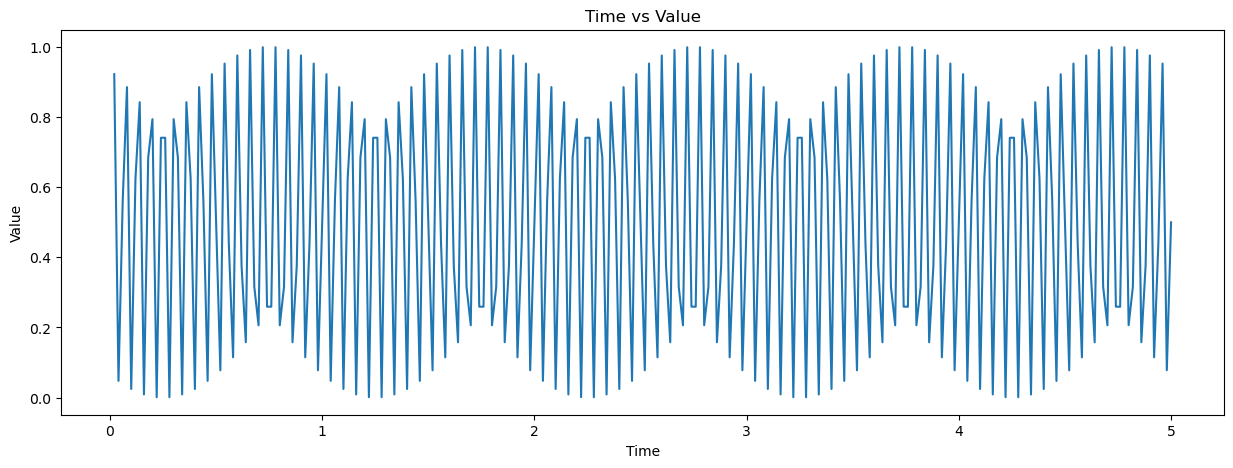

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [12]:
import csv
import matplotlib.pyplot as plt

path = "/Users/barci/Downloads/Experiment2_Marker.csv"
# Read the CSV file
with open(path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    time = []
    value = []
    start_time = None
    for row in reader:
        if len(row) == 2 and row[0].replace(".", "").isdigit() and row[1].replace(".", "").isdigit():
            # Extract time and value columns
            time.append(float(row[0]))
            value.append(float(row[1]))
        elif len(row) == 2 and row[1] == 'start':
            # Update start_time for new experiment
            start_time = float(row[0])
        elif len(row) == 1 and row[0].replace(".", "").isdigit() and start_time is not None:
            # Extract time and value columns for experiments
            time.append(float(row[0]) + start_time)
            row = next(reader)  # Skip the next row after the 'start' row
            value.append(float(row[0]))
            start_time = None

# Plot time vs value
plt.figure(figsize=(15, 5))
#do a low pass filer on the value

plt.plot(time, value)
# change figsize 

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Value')
plt.show()
from scipy.signal import butter, freqz
import numpy as np
import matplotlib.pyplot as plt

# Filter requirements.
order = 6
fs = 72       # sample rate, Hz
cutoff = 1.0  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter(order, cutoff, btype='high', analog=False)
w, h = freqz(b, a, worN=8000)

# Plot the frequency response.
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')   
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter Frequency Response")  # Changed title to match the filter type
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()


